In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans, MiniBatchKMeans
import sklearn.metrics as ms
import scipy as sc
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
plt.rcParams.update({'font.size': 14})

In [3]:
lw = []
file = open("20k.txt", "r")
for line in file:
    lw.append(line.strip())
file.close()
lw.sort()

In [4]:
def find_lw(object):
    l = 0
    r = 20000 - 1
    while l <= r:
        c = (l + r) // 2
        if object < lw[c]:
            r = c - 1
        elif object > lw[c]:
            l = c + 1
        else:
            return True
    return False

In [5]:
%%time
lv = np.array([])
file = open("wiki.en.vec", "r")
out = open("wiki.en.vec.needed", "w")
for line in file:
    #if find_lw(line[:line.index(" ")]):
    if line[:line.index(" ")] in lw:
        out.write(line)
file.close()
out.close()

KeyboardInterrupt: 

In [6]:
%%time
lv = np.array([])
file = open("wiki.en.vec", "r")
out = open("wiki.en.vec.needed", "w")
for line in file:
    if find_lw(line[:line.index(" ")]):
    #if line[:line.index(" ")] in lw:
        out.write(line)
file.close()
out.close()

CPU times: user 20.1 s, sys: 2.41 s, total: 22.5 s
Wall time: 45 s


In [7]:
data = pd.read_csv("wiki.en.vec.needed", header = None, sep = " ")
data.head()

,0,1,2,3,4,5,6,7,8,9,...,292,293,294,295,296,297,298,299,300,301
0,the,-0.065334,-0.093031,-0.017571,0.20007,0.029521,-0.039920,-0.163280,-0.072946,0.089604,...,-0.216730,-0.037683,0.081860,-0.039891,-0.051334,-0.101650,0.166420,-0.130790,0.035397,NaN
1,of,0.048804,-0.285280,0.018557,0.20577,0.060704,0.085446,-0.036267,-0.068373,0.145070,...,-0.336770,-0.060286,0.086097,-0.065001,0.004833,-0.100960,0.139100,-0.137140,-0.039705,NaN
2,in,0.123670,-0.139650,0.044877,0.18919,-0.109970,-0.006446,0.050499,-0.204390,-0.015761,...,-0.318040,0.125330,-0.081507,-0.111400,0.017582,-0.037359,0.064740,-0.145810,0.161750,NaN
3,and,-0.031533,0.046278,-0.125340,0.19165,-0.126600,-0.012853,0.103420,-0.009808,0.151890,...,-0.107860,0.183140,0.138810,0.027570,-0.035073,-0.017829,0.111630,-0.058231,0.011977,NaN
4,to,-0.213410,0.153530,0.052880,-0.10995,-0.075249,-0.004093,0.037307,-0.123070,-0.165390,...,0.020689,0.007836,0.181550,0.293270,-0.215300,-0.241520,-0.025937,-0.072507,0.149890,NaN


In [8]:
data = data.drop(columns = [0, 301], axis = 1)
data.head()

,1,2,3,4,5,6,7,8,9,10,...,291,292,293,294,295,296,297,298,299,300
0,-0.065334,-0.093031,-0.017571,0.20007,0.029521,-0.039920,-0.163280,-0.072946,0.089604,0.080907,...,0.064944,-0.216730,-0.037683,0.081860,-0.039891,-0.051334,-0.101650,0.166420,-0.130790,0.035397
1,0.048804,-0.285280,0.018557,0.20577,0.060704,0.085446,-0.036267,-0.068373,0.145070,0.178520,...,0.169560,-0.336770,-0.060286,0.086097,-0.065001,0.004833,-0.100960,0.139100,-0.137140,-0.039705
2,0.123670,-0.139650,0.044877,0.18919,-0.109970,-0.006446,0.050499,-0.204390,-0.015761,0.150490,...,0.025115,-0.318040,0.125330,-0.081507,-0.111400,0.017582,-0.037359,0.064740,-0.145810,0.161750
3,-0.031533,0.046278,-0.125340,0.19165,-0.126600,-0.012853,0.103420,-0.009808,0.151890,0.275820,...,0.154940,-0.107860,0.183140,0.138810,0.027570,-0.035073,-0.017829,0.111630,-0.058231,0.011977
4,-0.213410,0.153530,0.052880,-0.10995,-0.075249,-0.004093,0.037307,-0.123070,-0.165390,0.189480,...,0.027739,0.020689,0.007836,0.181550,0.293270,-0.215300,-0.241520,-0.025937,-0.072507,0.149890


$$\Phi_0 = \sum_{y \in Y} \dfrac{1}{|K_y|} \sum_{i:y_i = y} \rho^2 (x_i, \mu_y)$$

In [19]:
def Euclidean_Internal_Dist(data, pred, model, k):
    ret = 0
    for y in range(k):
        summ = 0
        cnt = 0
        for i in range(19924):
            if y == pred[i]: 
                cnt += 1
                summ += np.linalg.norm(data.values[i] - model.cluster_centers_[y]) ** 2
        if cnt > 0:
            ret += summ / cnt
    return ret

$$\Phi_1 = \sum_{y \in Y} \rho^2 (\mu_y, \mu)$$

In [20]:
def Euclidean_External_Dist(data, pred, model, k):
    ret = 0
    mu = np.sum(data.values, axis = 0)/19924
    for y in range(k):
        ret += np.linalg.norm(model.cluster_centers_[y] - mu) ** 2
    return ret

$$C_0 = \sum_{y \in Y} \dfrac{1}{|K_y|}\sum_{i:y_i = y} \left( 1 - \dfrac{(x_i, \mu_y)}{||x_i|| \cdot ||\mu_y||} \right)$$

In [21]:
def Cosine_Internal_Dist(data, pred, model, k):
    ret = 0
    for y in range(k):
        summ = 0
        cnt = 0
        for i in range(19924):
            if y == pred[i]:
                cnt += 1
                summ += sc.spatial.distance.cosine(data.values[i], model.cluster_centers_[y])
        if cnt > 0:
            ret += summ / cnt
    return ret

$$C_1 = \sum_{y \in Y}\left(1-\dfrac{(\mu_y, \mu)}{||\mu_y||\cdot ||\mu||}\right)$$

In [22]:
def Cosine_External_Dist(data, pred, model, k):
    ret = 0
    mu = np.sum(data.values, axis = 0)/19924
    for y in range(k):
        ret += sc.spatial.distance.cosine(model.cluster_centers_[y], mu)
    return ret

$$k = 2, 3, \dotsc, 10 \Rightarrow 9$$

In [42]:
euc_int = np.array([[0. for i in range(10)] for i in range(9)])
euc_ext = np.array([[0. for i in range(10)] for i in range(9)])
cos_int = np.array([[0. for i in range(10)] for i in range(9)])
cos_ext = np.array([[0. for i in range(10)] for i in range(9)])
euc_sil = np.array([[0. for i in range(10)] for i in range(9)])
cos_sil = np.array([[0. for i in range(10)] for i in range(9)])

j = 0
for k in range(2, 11):
    print("k =", k)
    for i in range(10):
        print("i =", i)
        model = MiniBatchKMeans(k, batch_size = max(20 * k, 142))
        pred = model.fit_predict(data)
        cos_int[j][i] = Cosine_Internal_Dist(data, pred, model, k)
        cos_ext[j][i] = Cosine_External_Dist(data, pred, model, k)
        euc_ext[j][i] = Euclidian_External_Dist(data, pred, model, k)
        euc_int[j][i] = Euclidian_Internal_Dist(data, pred, model, k)
        euc_sil[j][i] = silhouette_score(data, pred)
        cos_sil[j][i] = silhouette_score(data, pred, metric='cosine')
    j += 1

k = 2
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 3
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 4
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 5
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 6
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 7
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 8
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 9
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 10
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9


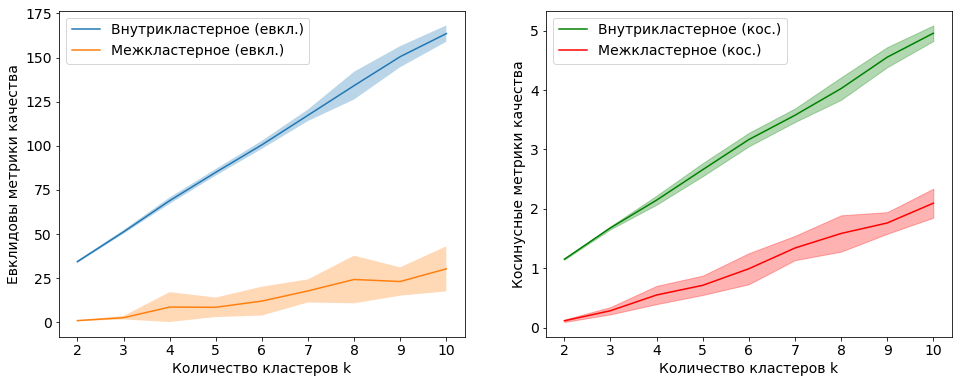

In [141]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), [np.mean(i) for i in euc_int])
plt.fill_between(range(2,11), [np.mean(i) - np.std(i) for i in euc_int],
                              [np.mean(i) + np.std(i) for i in euc_int], alpha=0.3)
plt.plot(range(2, 11), [np.mean(i) for i in euc_ext])
plt.fill_between(range(2,11), [np.mean(i) - np.std(i) for i in euc_ext],
                              [np.mean(i) + np.std(i) for i in euc_ext], alpha=0.3)
plt.xlabel("Количество кластеров k")
plt.ylabel("Евклидовы метрики качества")
plt.legend(["Внутрикластерное (евкл.)", "Межкластерное (евкл.)"])

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), [np.mean(i) for i in cos_int], c = "g")
plt.fill_between(range(2,11), [np.mean(i) - np.std(i) for i in cos_int],
                              [np.mean(i) + np.std(i) for i in cos_int], alpha=0.3, color = "green")
plt.plot(range(2, 11), [np.mean(i) for i in cos_ext], c = "r")
plt.fill_between(range(2,11), [np.mean(i) - np.std(i) for i in cos_ext],
                              [np.mean(i) + np.std(i) for i in cos_ext], alpha=0.3, color = "red")
plt.xlabel("Количество кластеров k")
plt.ylabel("Косинусные метрики качества")
plt.legend(["Внутрикластерное (кос.)", "Межкластерное (кос.)"])
plt.show()


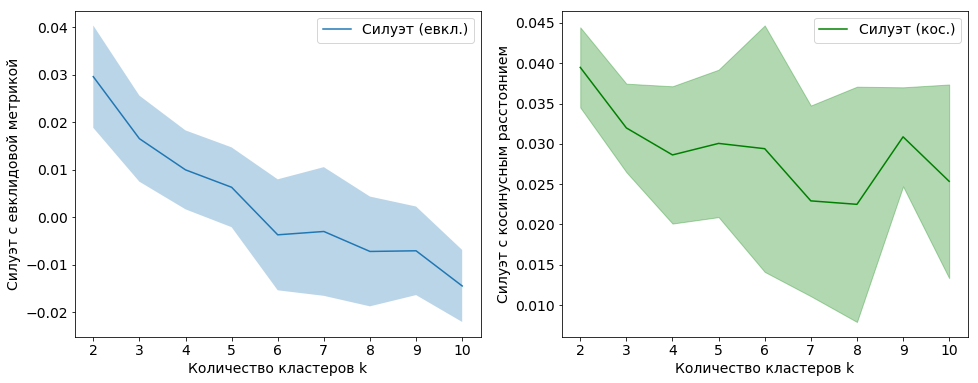

In [127]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.plot(range(2, 11), [np.mean(i) for i in euc_sil])
plt.fill_between(range(2,11), [np.mean(i) - np.std(i) for i in euc_sil],
                              [np.mean(i) + np.std(i) for i in euc_sil], alpha=0.3)
plt.xlabel("Количество кластеров k")
plt.ylabel("Силуэт с евклидовой метрикой")
plt.legend(["Силуэт (евкл.)"], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(range(2, 11), [np.mean(i) for i in cos_sil], c = "g")
plt.fill_between(range(2,11), [np.mean(i) - np.std(i) for i in cos_sil],
                              [np.mean(i) + np.std(i) for i in cos_sil], alpha=0.3, color = "g")
plt.xlabel("Количество кластеров k")
plt.ylabel("Силуэт с косинусным расстоянием")
plt.legend(["Силуэт (кос.)"], loc='upper right')
plt.show()


In [52]:
np.savetxt('k2-10/euc_int.txt', euc_int)
np.savetxt('k2-10/euc_ext.txt', euc_ext)
np.savetxt('k2-10/cos_int.txt', cos_int)
np.savetxt('k2-10/cos_ext.txt', cos_ext)
np.savetxt('k2-10/euc_sil.txt', euc_sil)
np.savetxt('k2-10/cos_sil.txt', cos_sil)

$$k = 10, 20, \dotsc, 100 \Rightarrow 10$$

In [54]:
euc_int_2 = np.array([[0. for i in range(10)] for i in range(10)])
euc_ext_2 = np.array([[0. for i in range(10)] for i in range(10)])
cos_int_2 = np.array([[0. for i in range(10)] for i in range(10)])
cos_ext_2 = np.array([[0. for i in range(10)] for i in range(10)])
euc_sil_2 = np.array([[0. for i in range(10)] for i in range(10)])
cos_sil_2 = np.array([[0. for i in range(10)] for i in range(10)])

j = 0
for k in np.arange(10, 101, 10):
    print("k =", k)
    for i in range(10):
        print("i =", i)
        model = MiniBatchKMeans(k, batch_size = max(20 * k, 142))
        pred = model.fit_predict(data)
        cos_int_2[j][i] = Cosine_Internal_Dist(data, pred, model, k)
        cos_ext_2[j][i] = Cosine_External_Dist(data, pred, model, k)
        euc_ext_2[j][i] = Euclidian_External_Dist(data, pred, model, k)
        euc_int_2[j][i] = Euclidian_Internal_Dist(data, pred, model, k)
        euc_sil_2[j][i] = silhouette_score(data, pred)
        cos_sil_2[j][i] = silhouette_score(data, pred, metric='cosine')
    j += 1

k = 10
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 20
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 30
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 40
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 50
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 60
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 70
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 80
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 90
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 100
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9


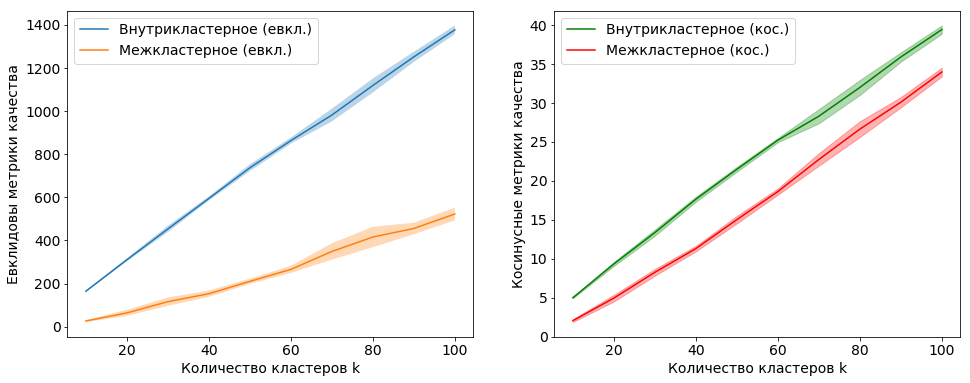

In [140]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(10, 101, 10), [np.mean(i) for i in euc_int_2])
plt.fill_between(np.arange(10, 101, 10), [np.mean(i) - np.std(i) for i in euc_int_2],
                                         [np.mean(i) + np.std(i) for i in euc_int_2], alpha=0.3)
plt.plot(np.arange(10, 101, 10), [np.mean(i) for i in euc_ext_2])
plt.fill_between(np.arange(10, 101, 10), [np.mean(i) - np.std(i) for i in euc_ext_2],
                                         [np.mean(i) + np.std(i) for i in euc_ext_2], alpha=0.3)
plt.xlabel("Количество кластеров k")
plt.ylabel("Евклидовы метрики качества")
plt.legend(["Внутрикластерное (евкл.)", "Межкластерное (евкл.)"])

plt.subplot(1, 2, 2)
plt.plot(np.arange(10, 101, 10), [np.mean(i) for i in cos_int_2], c = "g")
plt.fill_between(np.arange(10, 101, 10), [np.mean(i) - np.std(i) for i in cos_int_2],
                                         [np.mean(i) + np.std(i) for i in cos_int_2], alpha=0.3, color = "green")
plt.plot(np.arange(10, 101, 10), [np.mean(i) for i in cos_ext_2], c = "r")
plt.fill_between(np.arange(10, 101, 10), [np.mean(i) - np.std(i) for i in cos_ext_2],
                                         [np.mean(i) + np.std(i) for i in cos_ext_2], alpha=0.3, color = "red")
plt.xlabel("Количество кластеров k")
plt.ylabel("Косинусные метрики качества")
plt.legend(["Внутрикластерное (кос.)", "Межкластерное (кос.)"])
plt.show()


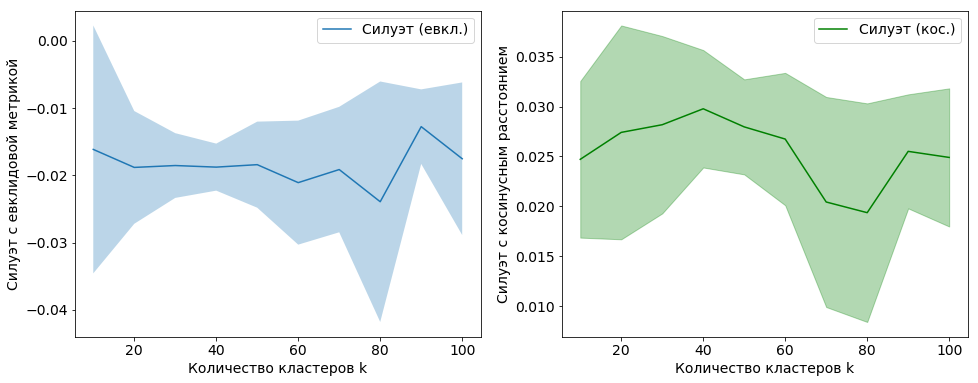

In [128]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(10, 101, 10), [np.mean(i) for i in euc_sil_2])
plt.fill_between(np.arange(10, 101, 10), [np.mean(i) - np.std(i) for i in euc_sil_2],
                                         [np.mean(i) + np.std(i) for i in euc_sil_2], alpha=0.3)
plt.xlabel("Количество кластеров k")
plt.ylabel("Силуэт с евклидовой метрикой")
plt.legend(["Силуэт (евкл.)"], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(np.arange(10, 101, 10), [np.mean(i) for i in cos_sil_2], c = "g")
plt.fill_between(np.arange(10, 101, 10), [np.mean(i) - np.std(i) for i in cos_sil_2],
                                         [np.mean(i) + np.std(i) for i in cos_sil_2], alpha=0.3, color = "g")
plt.xlabel("Количество кластеров k")
plt.ylabel("Силуэт с косинусным расстоянием")
plt.legend(["Силуэт (кос.)"], loc='upper right')
plt.show()

In [59]:
np.savetxt('k10-100/euc_int.txt', euc_int_2)
np.savetxt('k10-100/euc_ext.txt', euc_ext_2)
np.savetxt('k10-100/cos_int.txt', cos_int_2)
np.savetxt('k10-100/cos_ext.txt', cos_ext_2)
np.savetxt('k10-100/euc_sil.txt', euc_sil_2)
np.savetxt('k10-100/cos_sil.txt', cos_sil_2)

$$k = 100, 200, \dotsc, 1000 \Rightarrow 10$$

In [60]:
euc_int_3 = np.array([[0. for i in range(10)] for i in range(10)])
euc_ext_3 = np.array([[0. for i in range(10)] for i in range(10)])
cos_int_3 = np.array([[0. for i in range(10)] for i in range(10)])
cos_ext_3 = np.array([[0. for i in range(10)] for i in range(10)])
euc_sil_3 = np.array([[0. for i in range(10)] for i in range(10)])
cos_sil_3 = np.array([[0. for i in range(10)] for i in range(10)])

j = 0
for k in np.arange(100, 1010, 100):
    print("k =", k)
    for i in range(10):
        print("i =", i)
        model = MiniBatchKMeans(k, batch_size = min(max(20 * k, 142), 19924))
        pred = model.fit_predict(data)
        cos_int_3[j][i] = Cosine_Internal_Dist(data, pred, model, k)
        cos_ext_3[j][i] = Cosine_External_Dist(data, pred, model, k)
        euc_ext_3[j][i] = Euclidian_External_Dist(data, pred, model, k)
        euc_int_3[j][i] = Euclidian_Internal_Dist(data, pred, model, k)
        euc_sil_3[j][i] = silhouette_score(data, pred)
        cos_sil_3[j][i] = silhouette_score(data, pred, metric='cosine')
    j += 1

k = 100
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 200
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 300
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 400
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 500
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 600
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 700
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 800
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 900
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9
k = 1000
i = 0
i = 1
i = 2
i = 3
i = 4
i = 5
i = 6
i = 7
i = 8
i = 9


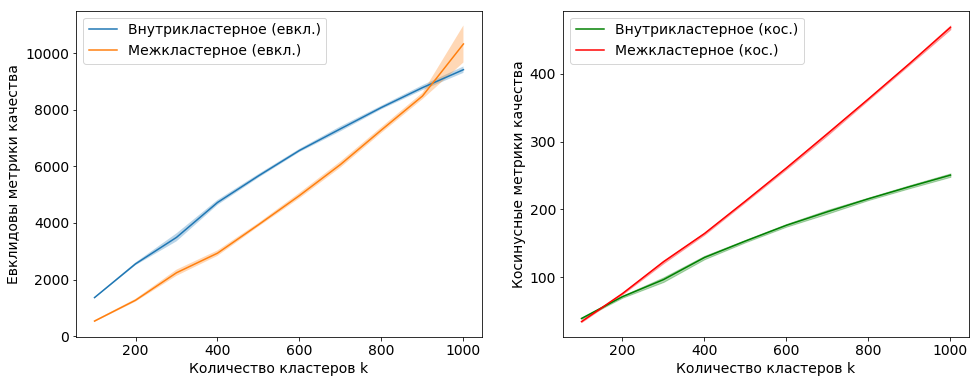

In [139]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(100, 1010, 100), [np.mean(i) for i in euc_int_3])
plt.fill_between(np.arange(100, 1010, 100), [np.mean(i) - np.std(i) for i in euc_int_3],
                                            [np.mean(i) + np.std(i) for i in euc_int_3], alpha=0.3)
plt.plot(np.arange(100, 1010, 100), [np.mean(i) for i in euc_ext_3])
plt.fill_between(np.arange(100, 1010, 100), [np.mean(i) - np.std(i) for i in euc_ext_3],
                                            [np.mean(i) + np.std(i) for i in euc_ext_3], alpha=0.3)
plt.xlabel("Количество кластеров k")
plt.ylabel("Евклидовы метрики качества")
plt.legend(["Внутрикластерное (евкл.)", "Межкластерное (евкл.)"])

plt.subplot(1, 2, 2)
plt.plot(np.arange(100, 1010, 100), [np.mean(i) for i in cos_int_3], c = "g")
plt.fill_between(np.arange(100, 1010, 100), [np.mean(i) - np.std(i) for i in cos_int_3],
                                            [np.mean(i) + np.std(i) for i in cos_int_3], alpha=0.3, color = "green")
plt.plot(np.arange(100, 1010, 100), [np.mean(i) for i in cos_ext_3], c = "r")
plt.fill_between(np.arange(100, 1010, 100), [np.mean(i) - np.std(i) for i in cos_ext_3],
                                            [np.mean(i) + np.std(i) for i in cos_ext_3], alpha=0.3, color = "red")
plt.xlabel("Количество кластеров k")
plt.ylabel("Косинусные метрики качества")
plt.legend(["Внутрикластерное (кос.)", "Межкластерное (кос.)"])
plt.show()


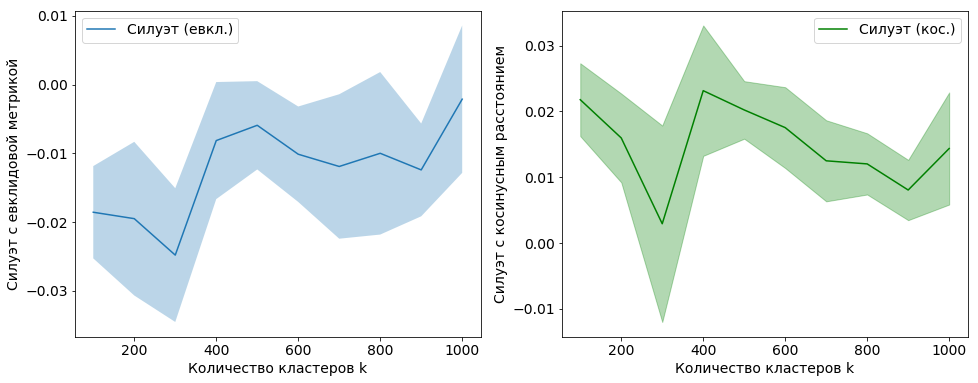

In [133]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(100, 1010, 100), [np.mean(i) for i in euc_sil_3])
plt.fill_between(np.arange(100, 1010, 100), [np.mean(i) - np.std(i) for i in euc_sil_3],
                                            [np.mean(i) + np.std(i) for i in euc_sil_3], alpha=0.3)
plt.xlabel("Количество кластеров k")
plt.ylabel("Силуэт с евклидовой метрикой")
plt.legend(["Силуэт (евкл.)"], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(np.arange(100, 1010, 100), [np.mean(i) for i in cos_sil_3], c = "g")
plt.fill_between(np.arange(100, 1010, 100), [np.mean(i) - np.std(i) for i in cos_sil_3],
                                            [np.mean(i) + np.std(i) for i in cos_sil_3], alpha=0.3, color = "g")
plt.xlabel("Количество кластеров k")
plt.ylabel("Силуэт с косинусным расстоянием")
plt.legend(["Силуэт (кос.)"], loc='upper right')
plt.show()

In [61]:
np.savetxt('k100-1000/euc_int.txt', euc_int_3)
np.savetxt('k100-1000/euc_ext.txt', euc_ext_3)
np.savetxt('k100-1000/cos_int.txt', cos_int_3)
np.savetxt('k100-1000/cos_ext.txt', cos_ext_3)
np.savetxt('k100-1000/euc_sil.txt', euc_sil_3)
np.savetxt('k100-1000/cos_sil.txt', cos_sil_3)

$$k = 1000, 2000, \dotsc, 10000 \Rightarrow 10$$

In [23]:
euc_int_4 = np.array([[0. for i in range(10)] for i in range(10)])
euc_ext_4 = np.array([[0. for i in range(10)] for i in range(10)])
cos_int_4 = np.array([[0. for i in range(10)] for i in range(10)])
cos_ext_4 = np.array([[0. for i in range(10)] for i in range(10)])
euc_sil_4 = np.array([[0. for i in range(10)] for i in range(10)])
cos_sil_4 = np.array([[0. for i in range(10)] for i in range(10)])

j = 0
for k in np.arange(1000, 10001, 1000):
    print("k =", k)
    for i in range(10):
        print("i =", i)
        model = MiniBatchKMeans(k, batch_size = min(max(20 * k, 142), 19924))
        pred = model.fit_predict(data)
        cos_int_4[j][i] = Cosine_Internal_Dist(data, pred, model, k)
        cos_ext_4[j][i] = Cosine_External_Dist(data, pred, model, k)
        euc_ext_4[j][i] = Euclidian_External_Dist(data, pred, model, k)
        euc_int_4[j][i] = Euclidian_Internal_Dist(data, pred, model, k)
        euc_sil_4[j][i] = silhouette_score(data, pred)
        cos_sil_4[j][i] = silhouette_score(data, pred, metric='cosine')
    j += 1

k = 1000
i = 0


NameError: name 'Euclidian_External_Dist' is not defined

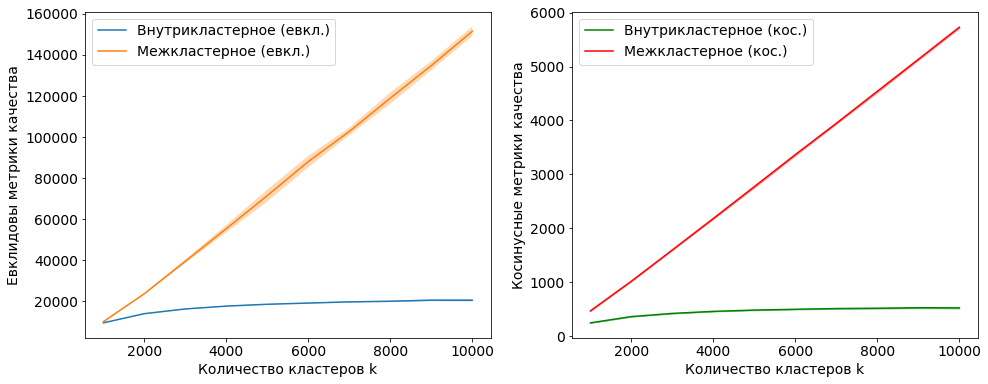

In [138]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1000, 10010, 1000), [np.mean(i) for i in euc_int_4])
plt.fill_between(np.arange(1000, 10010, 1000), [np.mean(i) - np.std(i) for i in euc_int_4],
                                               [np.mean(i) + np.std(i) for i in euc_int_4], alpha=0.3)
plt.plot(np.arange(1000, 10010, 1000), [np.mean(i) for i in euc_ext_4])
plt.fill_between(np.arange(1000, 10010, 1000), [np.mean(i) - np.std(i) for i in euc_ext_4],
                                               [np.mean(i) + np.std(i) for i in euc_ext_4], alpha=0.3)
plt.xlabel("Количество кластеров k")
plt.ylabel("Евклидовы метрики качества")
plt.legend(["Внутрикластерное (евкл.)", "Межкластерное (евкл.)"])

plt.subplot(1, 2, 2)
plt.plot(np.arange(1000, 10010, 1000), [np.mean(i) for i in cos_int_4], c = "g")
plt.fill_between(np.arange(1000, 10010, 1000), [np.mean(i) - np.std(i) for i in cos_int_4],
                                               [np.mean(i) + np.std(i) for i in cos_int_4], alpha=0.3, color = "green")
plt.plot(np.arange(1000, 10010, 1000), [np.mean(i) for i in cos_ext_4], c = "r")
plt.fill_between(np.arange(1000, 10010, 1000), [np.mean(i) - np.std(i) for i in cos_ext_4],
                                               [np.mean(i) + np.std(i) for i in cos_ext_4], alpha=0.3, color = "red")
plt.xlabel("Количество кластеров k")
plt.ylabel("Косинусные метрики качества")
plt.legend(["Внутрикластерное (кос.)", "Межкластерное (кос.)"])
plt.show()


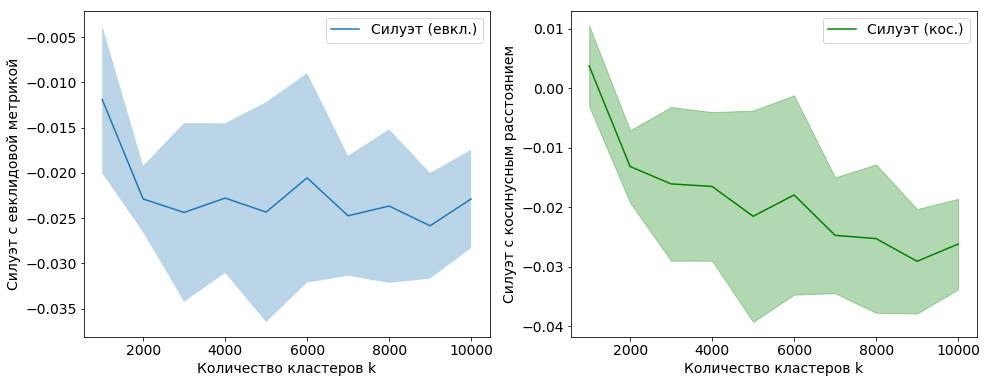

In [131]:
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.plot(np.arange(1000, 10010, 1000), [np.mean(i) for i in euc_sil_4])
plt.fill_between(np.arange(1000, 10010, 1000), [np.mean(i) - np.std(i) for i in euc_sil_4],
                                               [np.mean(i) + np.std(i) for i in euc_sil_4], alpha=0.3)
plt.xlabel("Количество кластеров k")
plt.ylabel("Силуэт с евклидовой метрикой")
plt.legend(["Силуэт (евкл.)"], loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(np.arange(1000, 10010, 1000), [np.mean(i) for i in cos_sil_4], c = "g")
plt.fill_between(np.arange(1000, 10010, 1000), [np.mean(i) - np.std(i) for i in cos_sil_4],
                                               [np.mean(i) + np.std(i) for i in cos_sil_4], alpha=0.3, color = "g")
plt.xlabel("Количество кластеров k")
plt.ylabel("Силуэт с косинусным расстоянием")
plt.legend(["Силуэт (кос.)"], loc='upper right')
plt.show()

In [68]:
Поискnp.savetxt('k1000-10000/euc_int.txt', euc_int_4)
np.savetxt('k1000-10000/euc_ext.txt', euc_ext_4)
np.savetxt('k1000-10000/cos_int.txt', cos_int_4)
np.savetxt('k1000-10000/cos_ext.txt', cos_ext_4)
np.savetxt('k1000-10000/euc_sil.txt', euc_sil_4)
np.savetxt('k1000-10000/cos_sil.txt', cos_sil_4)

In [298]:
model = MiniBatchKMeans(4, batch_size = 100)
pred = model.fit_predict(data)
print(k, pred)

97 [2 2 2 ... 3 0 3]


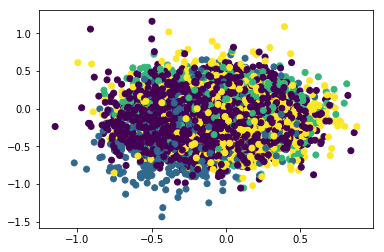

In [299]:
plt.scatter([i[132] for i in data.values], [i[106] for i in data.values], c = pred)
plt.show()

In [300]:
pca = PCA(2)

In [301]:
data_reduced = pca.fit_transform(X = data)
pca.components_

array([[-2.73848935e-02,  8.72635463e-02,  2.56865386e-02,
         1.67605886e-02, -2.19674432e-02, -3.29659105e-02,
         3.40488149e-02, -1.08833366e-01, -5.45912793e-02,
        -1.00585839e-01, -7.94935860e-02,  1.37549902e-02,
        -4.37719392e-02,  5.68908856e-02,  9.03722563e-02,
        -4.28258665e-02,  6.21392515e-02,  5.50038010e-02,
         7.22977358e-02,  2.90907352e-02,  7.53965142e-02,
        -9.56104783e-02,  5.14421327e-02, -3.10203281e-02,
        -1.01878770e-01, -4.97613491e-02, -4.23507158e-02,
        -1.59557077e-02, -7.47601613e-02,  2.37596674e-02,
        -3.62469925e-02,  7.95403589e-02,  4.39717774e-02,
         5.75417248e-02, -9.89981322e-02,  7.11134112e-02,
         2.27494174e-02,  1.38516238e-01, -6.00233491e-02,
        -9.76926087e-04, -2.68750321e-02, -5.42086605e-02,
         9.65945203e-02, -4.38212782e-02, -5.62347429e-02,
         7.18839300e-02,  4.87605257e-02,  6.79986738e-03,
         9.94756497e-02, -5.81471464e-02, -3.79775629e-0

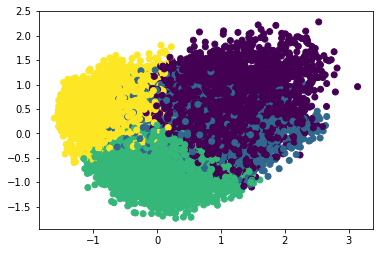

In [302]:
plt.scatter([i[0] for i in data_reduced], [i[1] for i in data_reduced], c = pred)

plt.show()

In [305]:
model = MiniBatchKMeans(4, batch_size = 100)
pred = model.fit_predict(data_reduced)
print(k, pred)

97 [3 3 3 ... 1 2 3]


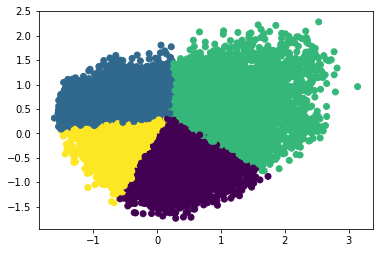

In [306]:
plt.scatter([i[0] for i in data_reduced], [i[1] for i in data_reduced], c = pred)

plt.show()

In [136]:
ans = []

for k in np.arange(950, 1150, 25):
    model = MiniBatchKMeans(k, batch_size = min(20*k, 19924), verbose=True)
    pred = model.fit_predict(data)
    print(k, pred)
    ans.append(silhouette_score(data, pred))

Init 1/3 with method: k-means++
Inertia for init 1/3: 214960.792344
Init 2/3 with method: k-means++
Inertia for init 2/3: 216351.136497
Init 3/3 with method: k-means++
Inertia for init 3/3: 216063.350687
Minibatch iteration 1/200: mean batch inertia: 11.472843, ewa inertia: 11.472843 
Minibatch iteration 2/200: mean batch inertia: 11.142365, ewa inertia: 11.142365 
Minibatch iteration 3/200: mean batch inertia: 11.013193, ewa inertia: 11.013193 
Minibatch iteration 4/200: mean batch inertia: 10.946713, ewa inertia: 10.946713 
Minibatch iteration 5/200: mean batch inertia: 10.892447, ewa inertia: 10.892447 
Minibatch iteration 6/200: mean batch inertia: 10.900448, ewa inertia: 10.900448 
Minibatch iteration 7/200: mean batch inertia: 10.843950, ewa inertia: 10.843950 
Minibatch iteration 8/200: mean batch inertia: 10.843083, ewa inertia: 10.843083 
Minibatch iteration 9/200: mean batch inertia: 10.792108, ewa inertia: 10.792108 
Minibatch iteration 10/200: mean batch inertia: 10.783862,

Minibatch iteration 2/100: mean batch inertia: 11.091389, ewa inertia: 11.091389 
Minibatch iteration 3/100: mean batch inertia: 10.908780, ewa inertia: 10.908780 
Minibatch iteration 4/100: mean batch inertia: 10.887381, ewa inertia: 10.887381 
Minibatch iteration 5/100: mean batch inertia: 10.860513, ewa inertia: 10.860513 
Minibatch iteration 6/100: mean batch inertia: 10.777422, ewa inertia: 10.777422 
Minibatch iteration 7/100: mean batch inertia: 10.709408, ewa inertia: 10.709408 
Minibatch iteration 8/100: mean batch inertia: 10.753250, ewa inertia: 10.753250 
Minibatch iteration 9/100: mean batch inertia: 10.680944, ewa inertia: 10.680944 
Minibatch iteration 10/100: mean batch inertia: 10.752411, ewa inertia: 10.752411 
Minibatch iteration 11/100: mean batch inertia: 10.677582, ewa inertia: 10.677582 
Minibatch iteration 12/100: mean batch inertia: 10.721041, ewa inertia: 10.721041 
Minibatch iteration 13/100: mean batch inertia: 10.769418, ewa inertia: 10.769418 
Minibatch it

1050 [ 29  29  29 ... 570 676 134]
Init 1/3 with method: k-means++
Inertia for init 1/3: 210183.242418
Init 2/3 with method: k-means++
Inertia for init 2/3: 209078.889487
Init 3/3 with method: k-means++
Inertia for init 3/3: 208165.852743
Minibatch iteration 1/100: mean batch inertia: 11.394730, ewa inertia: 11.394730 
Minibatch iteration 2/100: mean batch inertia: 10.906374, ewa inertia: 10.906374 
Minibatch iteration 3/100: mean batch inertia: 10.838606, ewa inertia: 10.838606 
Minibatch iteration 4/100: mean batch inertia: 10.717805, ewa inertia: 10.717805 
Minibatch iteration 5/100: mean batch inertia: 10.668434, ewa inertia: 10.668434 
Minibatch iteration 6/100: mean batch inertia: 10.661093, ewa inertia: 10.661093 
Minibatch iteration 7/100: mean batch inertia: 10.592212, ewa inertia: 10.592212 
Minibatch iteration 8/100: mean batch inertia: 10.592492, ewa inertia: 10.592492 
Minibatch iteration 9/100: mean batch inertia: 10.584498, ewa inertia: 10.584498 
Minibatch iteration 10/

Minibatch iteration 31/100: mean batch inertia: 10.373895, ewa inertia: 10.373895 
Minibatch iteration 32/100: mean batch inertia: 10.354773, ewa inertia: 10.354773 
Minibatch iteration 33/100: mean batch inertia: 10.382625, ewa inertia: 10.382625 
Minibatch iteration 34/100: mean batch inertia: 10.376209, ewa inertia: 10.376209 
Minibatch iteration 35/100: mean batch inertia: 10.443419, ewa inertia: 10.443419 
Minibatch iteration 36/100: mean batch inertia: 10.418885, ewa inertia: 10.418885 
Minibatch iteration 37/100: mean batch inertia: 10.414282, ewa inertia: 10.414282 
Minibatch iteration 38/100: mean batch inertia: 10.418592, ewa inertia: 10.418592 
Minibatch iteration 39/100: mean batch inertia: 10.454104, ewa inertia: 10.454104 
Minibatch iteration 40/100: mean batch inertia: 10.416119, ewa inertia: 10.416119 
Minibatch iteration 41/100: mean batch inertia: 10.381199, ewa inertia: 10.381199 
Minibatch iteration 42/100: mean batch inertia: 10.415560, ewa inertia: 10.415560 
Conv

In [137]:
ans

[-0.007780569480973988,
 -0.009760326520380539,
 -0.017335601426386318,
 -0.022677897057323804,
 -0.0023315559799901397,
 -0.004356225155269002,
 -0.011459905297329384,
 -0.003604907680949272]